In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
with open("/content/drive/MyDrive/yearly-bias/ALL.txt", "r") as f:
    all_numbers = []
    for line in f:
        all_numbers.append(int(line.split('-')[1].split('.')[0]))

print(len(all_numbers))

62


In [3]:
from tqdm import tqdm
from transformers import pipeline
from transformers import AutoModelForMaskedLM, RobertaTokenizerFast
import numpy as np
import torch
from tqdm import tqdm
from transformers import pipeline
from itertools import product, permutations, chain
import matplotlib.pyplot as plt
import scipy
import torch
import pickle

In [4]:
# word list from https://aclanthology.org/2022.naacl-main.122.pdf

# at the beginning, need to capitalize!!!!
tokens = ["He", "She"]

occupations = [
    "psychologist",
    "model",
    "server",
    "teacher",
    "batchmaker",
    "cashier",
    "authorizer",
    "fundraiser",
    "keyer",
    "technologist",
    "therapist",
    "planner",
    "interviewer", 
    "aide",
    "host",
    "tailor",
    "librarian",
    "phlebotomist",
    "assistant",
    "paralegal",
    "teller",
    "maid",
    "nurse",
    "receptionist",
    "typist",
    "hairdresser",
    "secretary",
    "dietitian",
    "hygienist",
    "pathologist",
    "mason",
    "pipelayer",
    "brickmason",
    "helper",
    "mechanic",
    "carpenter",
    "electrician",
    "roofer",
    "millwright",
    "installer",
    "repairer",
    "painter",
    "firefighter",
    "machinist",
    "conductor",
    "cabinetmaker",
    "pilot",
    "laborer", 
    "engineer",
    "cleaner",
    "programmer",
    "courier",
    "porter",
    "announcer",
    "estimator",
    "architect",
    "chef",
    "clergy",
    "drafter",
    "dishwasher"
]

100%|██████████| 60/60 [00:13<00:00,  4.46it/s]


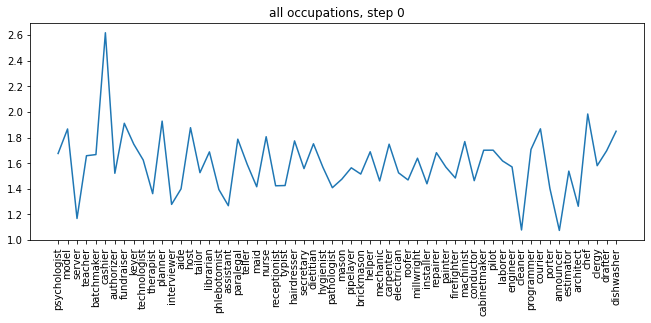

100%|██████████| 60/60 [00:09<00:00,  6.25it/s]


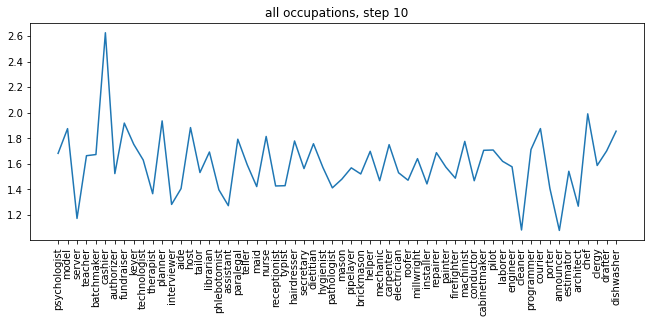

100%|██████████| 60/60 [00:10<00:00,  5.74it/s]


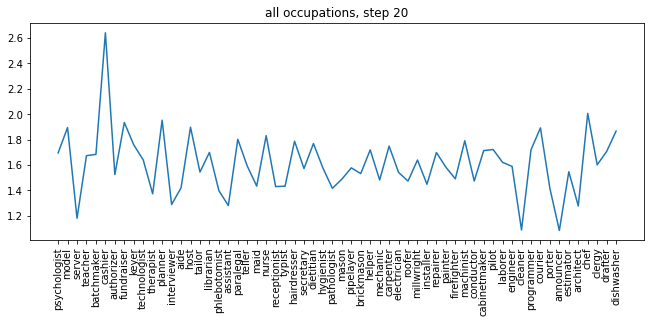

100%|██████████| 60/60 [00:09<00:00,  6.32it/s]


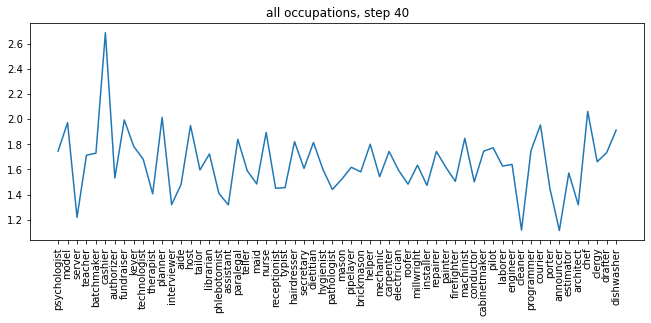

100%|██████████| 60/60 [00:11<00:00,  5.43it/s]


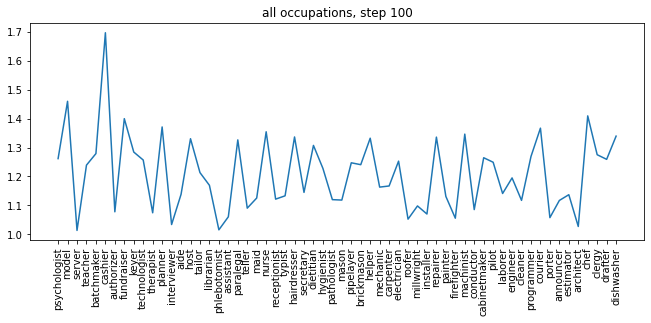

100%|██████████| 60/60 [00:09<00:00,  6.19it/s]


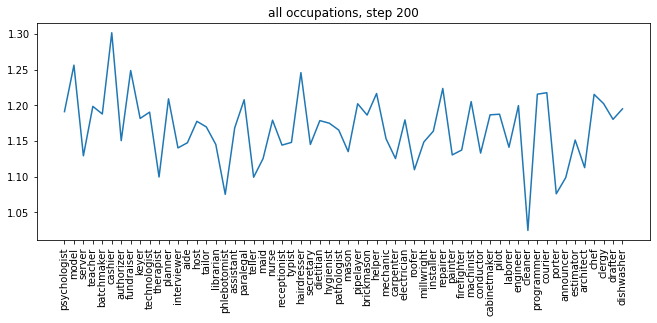

100%|██████████| 60/60 [00:09<00:00,  6.05it/s]


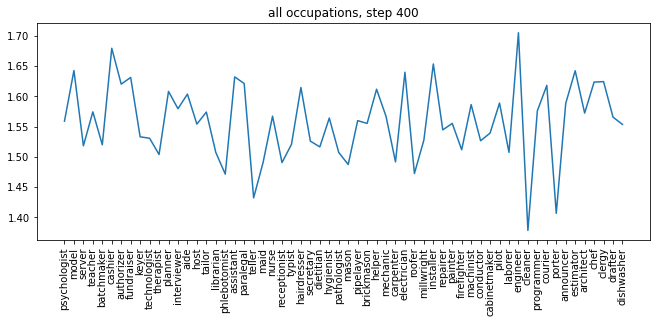

100%|██████████| 60/60 [00:10<00:00,  5.66it/s]


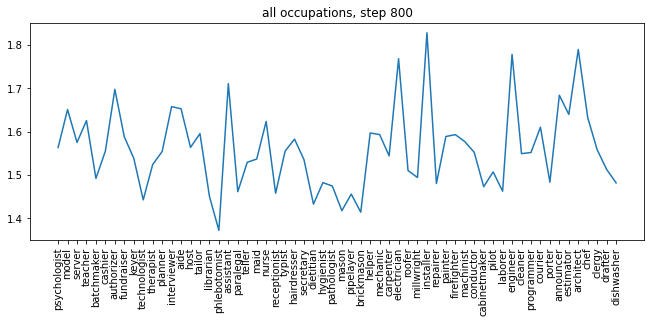

100%|██████████| 60/60 [00:12<00:00,  4.92it/s]


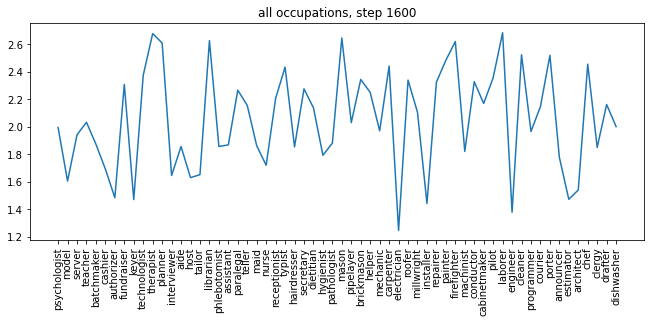

100%|██████████| 60/60 [00:09<00:00,  6.32it/s]


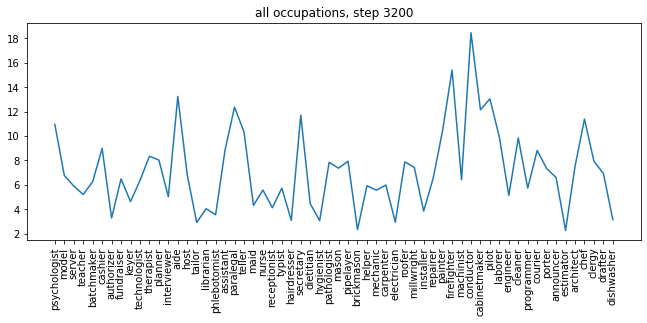

100%|██████████| 60/60 [00:10<00:00,  5.89it/s]


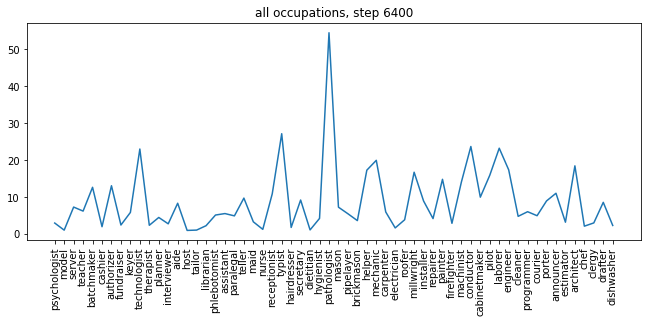

100%|██████████| 60/60 [00:10<00:00,  5.60it/s]


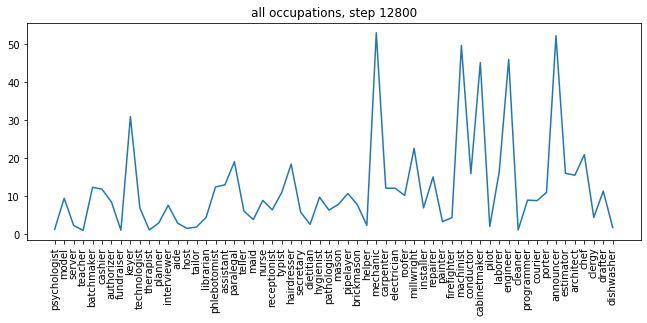

100%|██████████| 60/60 [00:10<00:00,  5.62it/s]


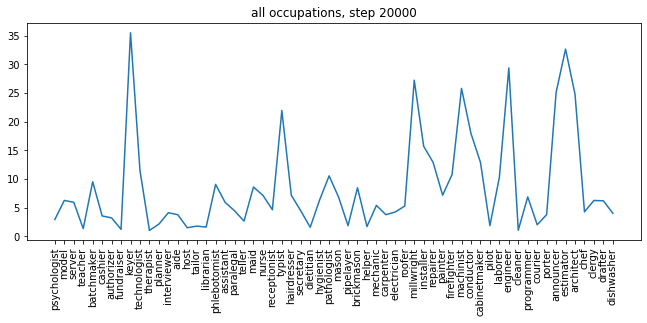

100%|██████████| 60/60 [00:10<00:00,  5.99it/s]


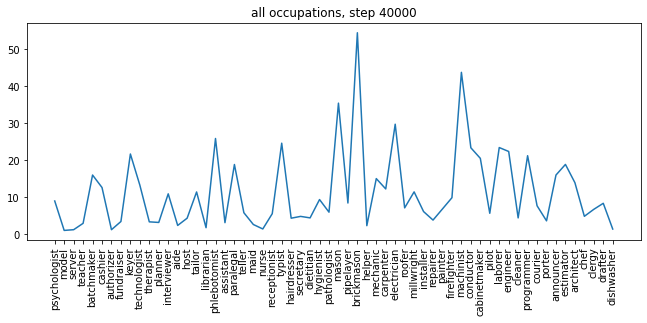

100%|██████████| 60/60 [00:10<00:00,  5.90it/s]


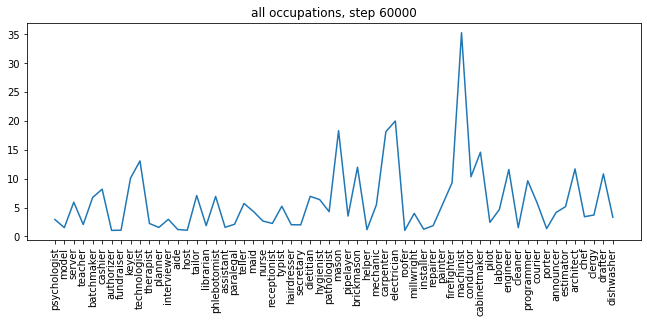

100%|██████████| 60/60 [00:10<00:00,  5.94it/s]


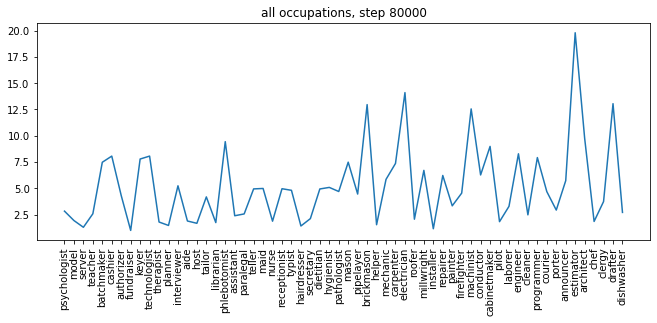

100%|██████████| 60/60 [00:11<00:00,  5.00it/s]


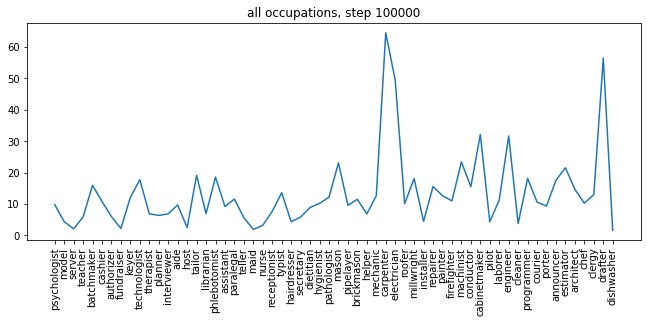

100%|██████████| 60/60 [00:09<00:00,  6.29it/s]


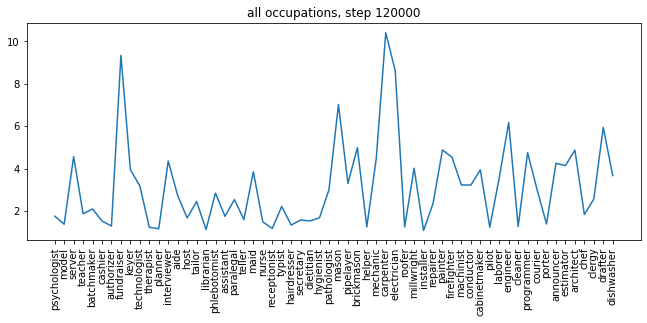

100%|██████████| 60/60 [00:09<00:00,  6.15it/s]


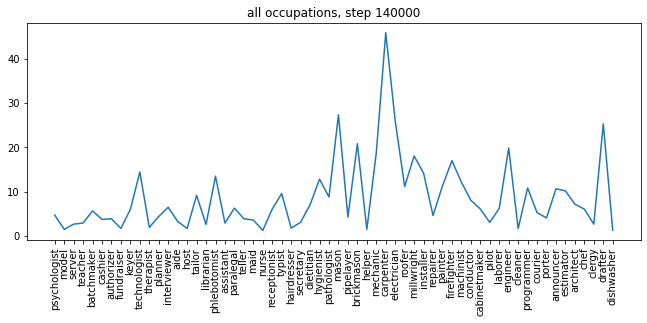

100%|██████████| 60/60 [00:10<00:00,  5.84it/s]


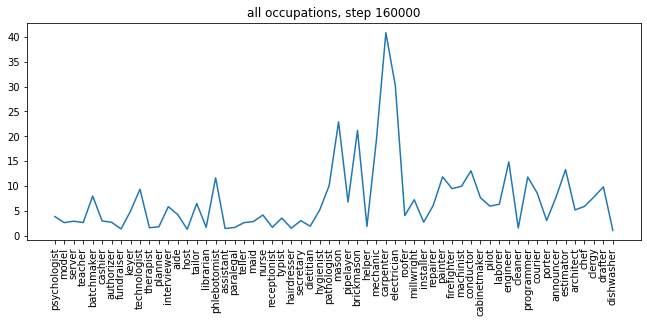

100%|██████████| 60/60 [00:11<00:00,  5.43it/s]


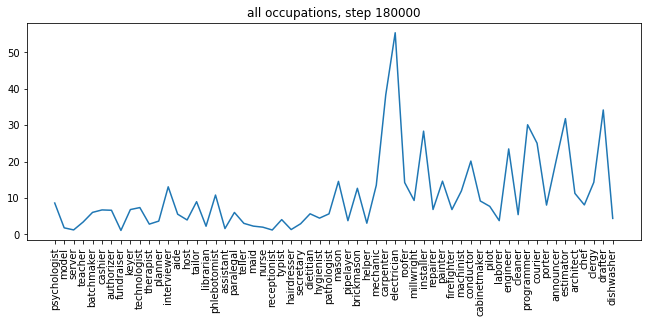

100%|██████████| 60/60 [00:10<00:00,  5.66it/s]


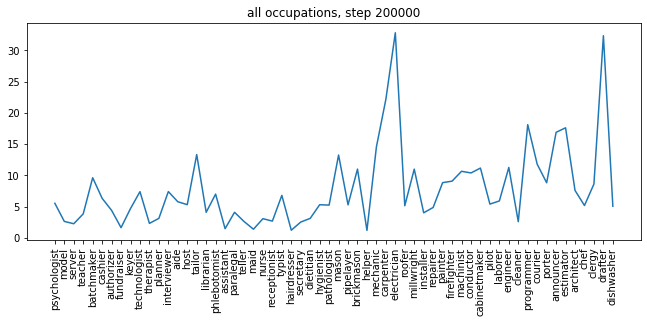

100%|██████████| 60/60 [00:10<00:00,  5.58it/s]


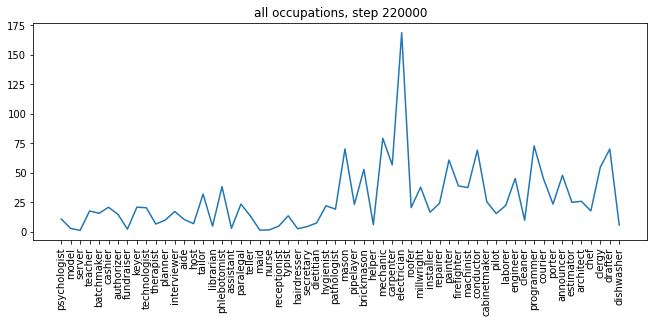

100%|██████████| 60/60 [00:10<00:00,  5.50it/s]


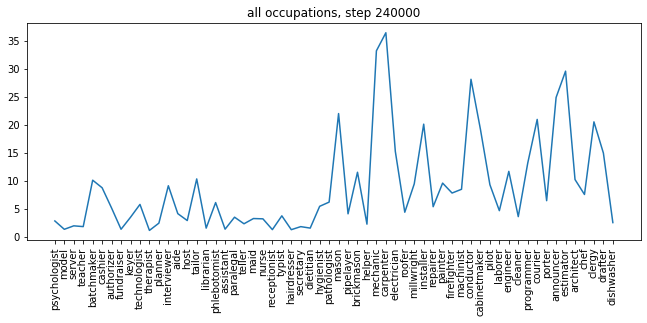

100%|██████████| 60/60 [00:10<00:00,  5.78it/s]


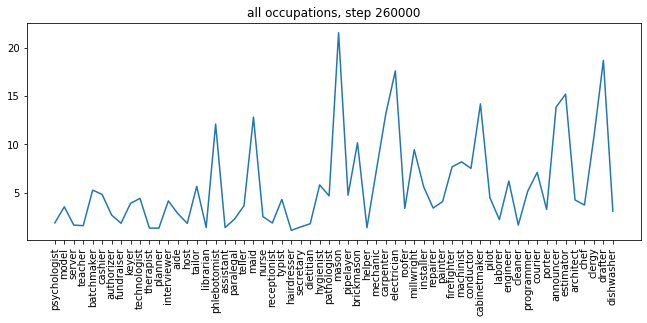

100%|██████████| 60/60 [00:09<00:00,  6.04it/s]


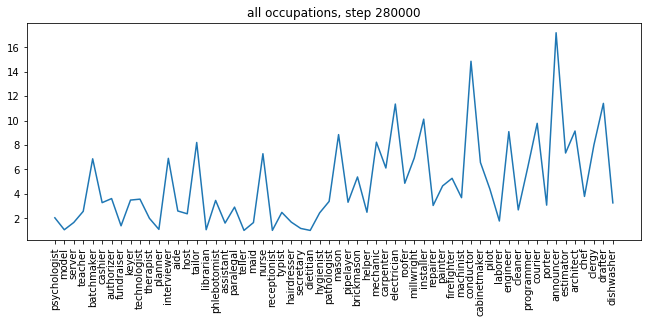

100%|██████████| 60/60 [00:11<00:00,  5.12it/s]


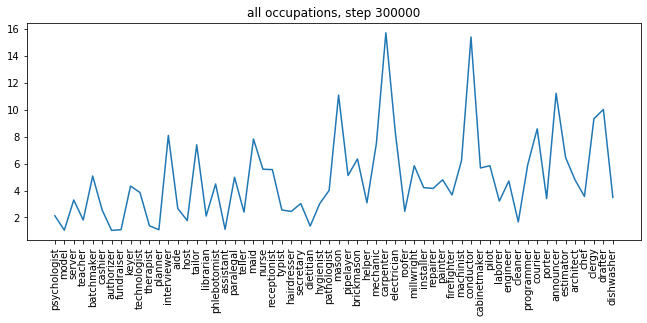

100%|██████████| 60/60 [00:11<00:00,  5.34it/s]


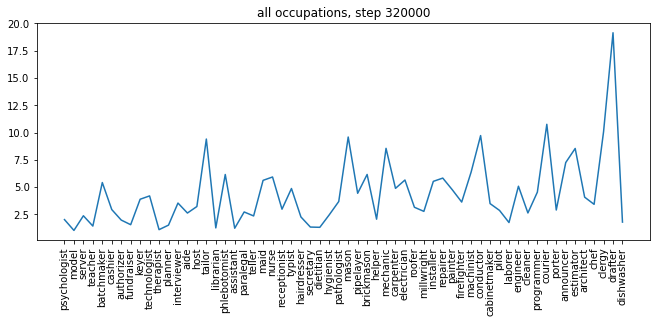

100%|██████████| 60/60 [00:11<00:00,  5.37it/s]


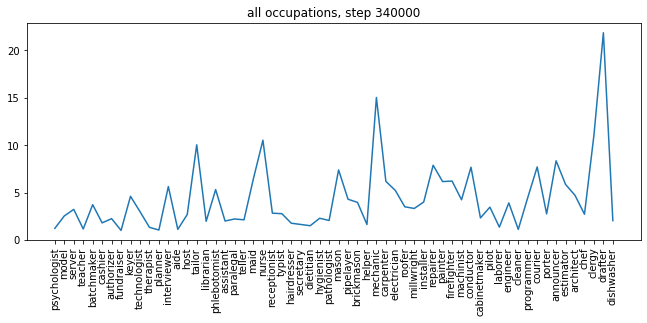

100%|██████████| 60/60 [00:11<00:00,  5.37it/s]


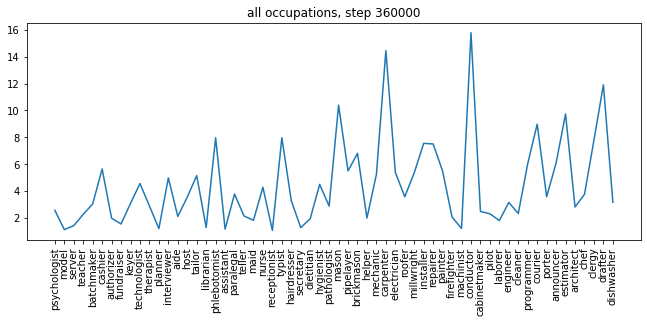

100%|██████████| 60/60 [00:10<00:00,  5.56it/s]


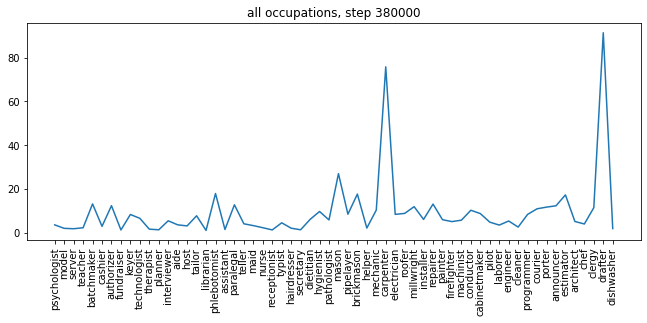

100%|██████████| 60/60 [00:16<00:00,  3.71it/s]


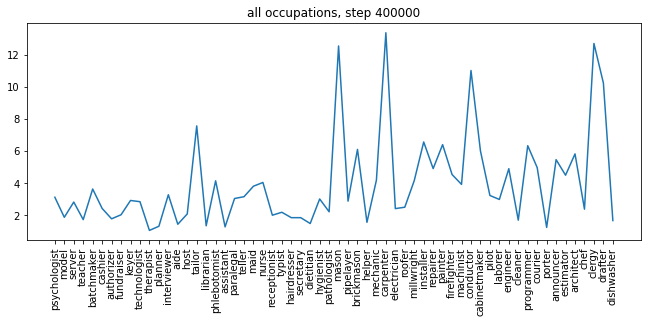

100%|██████████| 60/60 [00:10<00:00,  5.46it/s]


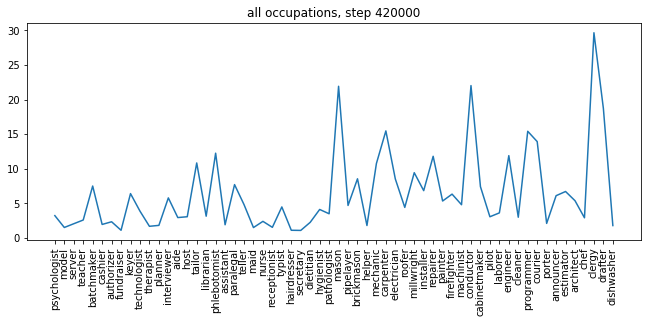

100%|██████████| 60/60 [00:11<00:00,  5.45it/s]


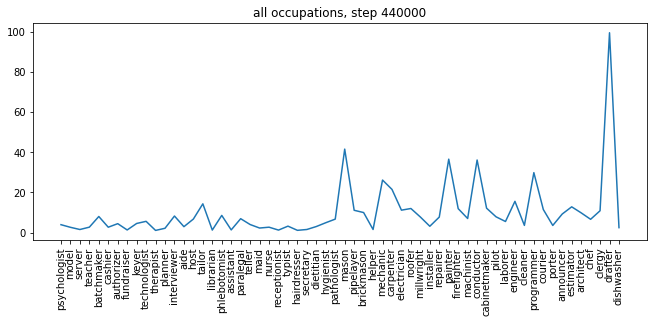

100%|██████████| 60/60 [00:11<00:00,  5.26it/s]


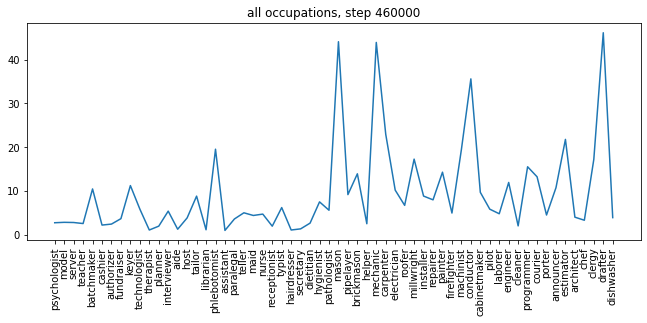

100%|██████████| 60/60 [00:11<00:00,  5.34it/s]


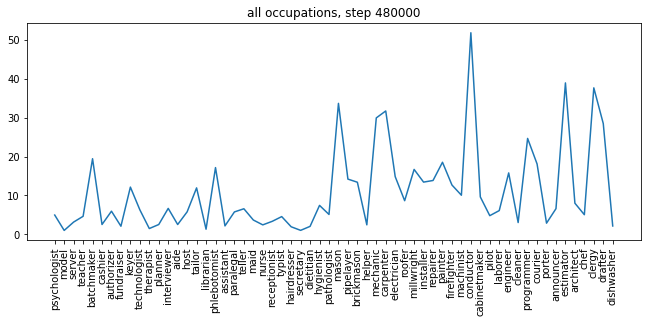

100%|██████████| 60/60 [00:11<00:00,  5.13it/s]


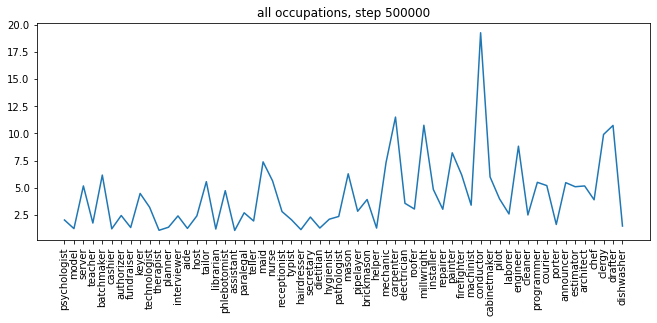

100%|██████████| 60/60 [00:11<00:00,  5.23it/s]


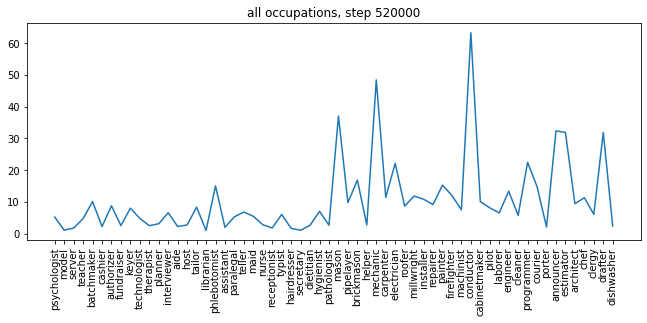

100%|██████████| 60/60 [00:13<00:00,  4.44it/s]


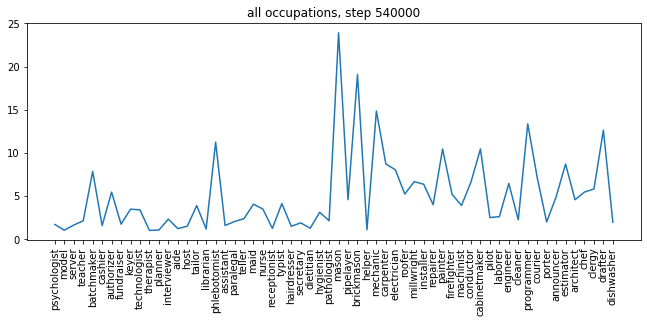

100%|██████████| 60/60 [00:11<00:00,  5.05it/s]


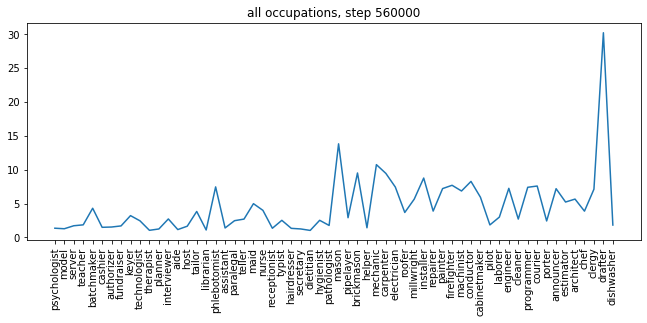

100%|██████████| 60/60 [00:11<00:00,  5.28it/s]


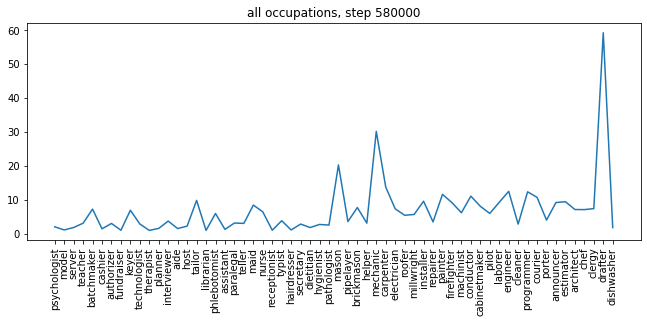

100%|██████████| 60/60 [00:12<00:00,  4.91it/s]


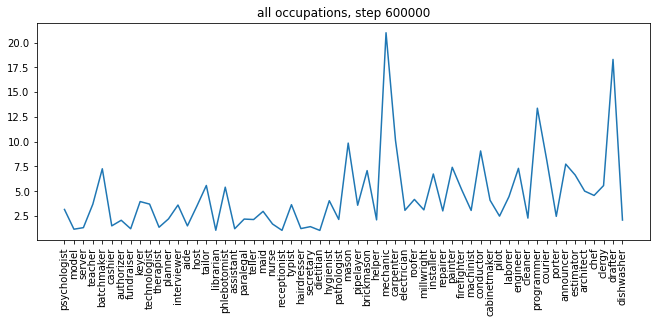

100%|██████████| 60/60 [00:11<00:00,  5.27it/s]


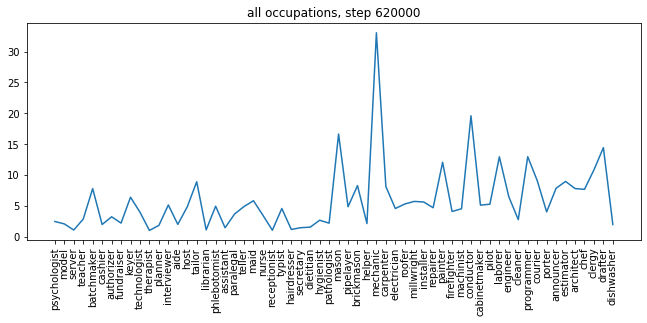

100%|██████████| 60/60 [00:11<00:00,  5.31it/s]


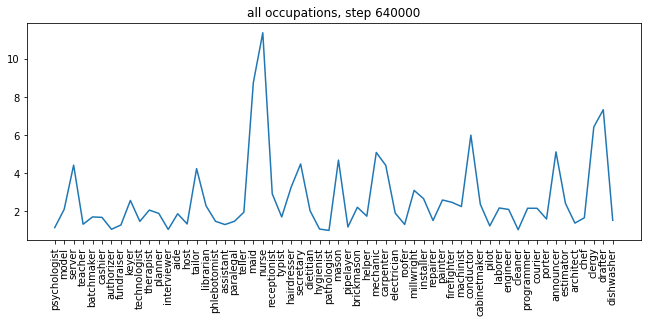

100%|██████████| 60/60 [00:12<00:00,  4.97it/s]


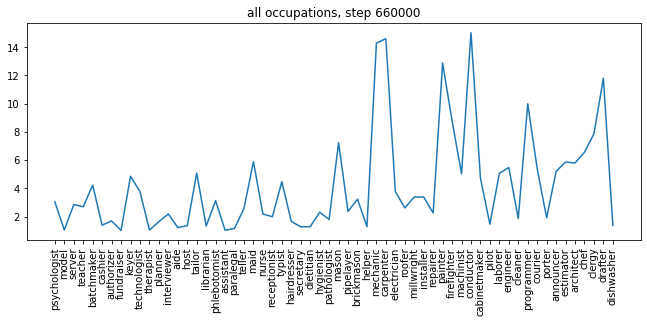

100%|██████████| 60/60 [00:12<00:00,  4.79it/s]


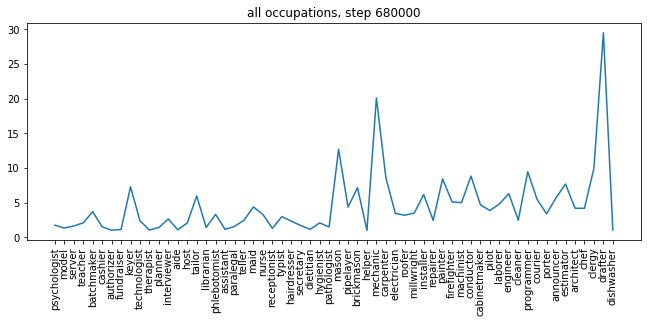

100%|██████████| 60/60 [00:11<00:00,  5.34it/s]


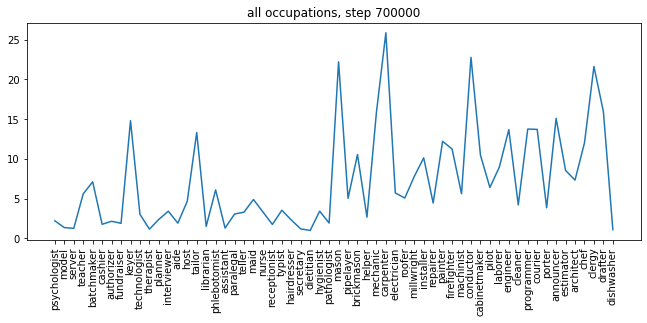

100%|██████████| 60/60 [00:11<00:00,  5.09it/s]


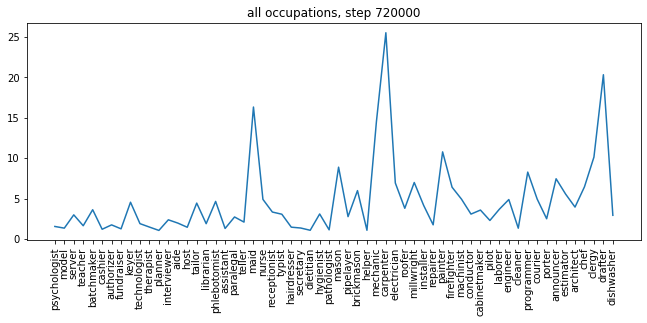

100%|██████████| 60/60 [00:12<00:00,  4.90it/s]


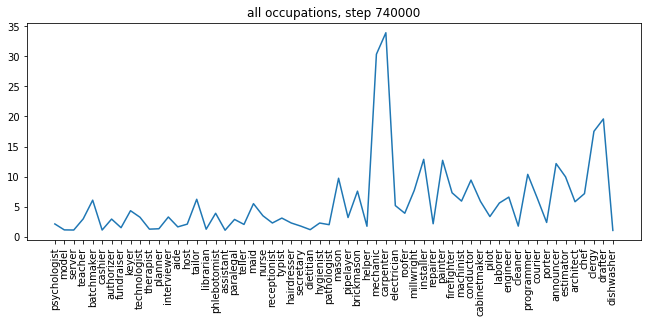

100%|██████████| 60/60 [00:11<00:00,  5.07it/s]


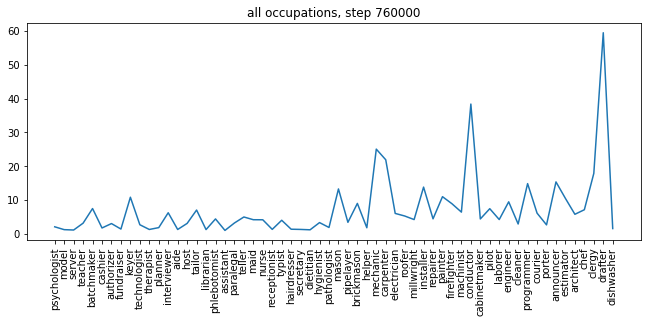

100%|██████████| 60/60 [00:12<00:00,  4.92it/s]


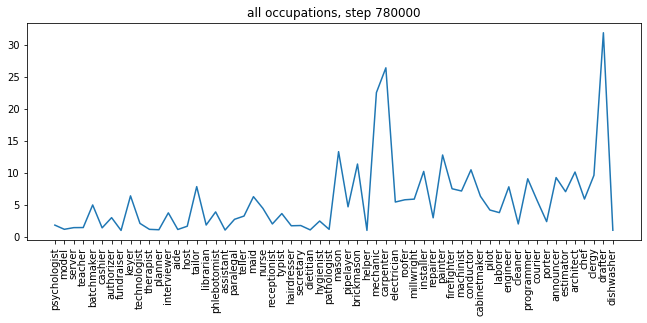

100%|██████████| 60/60 [00:11<00:00,  5.21it/s]


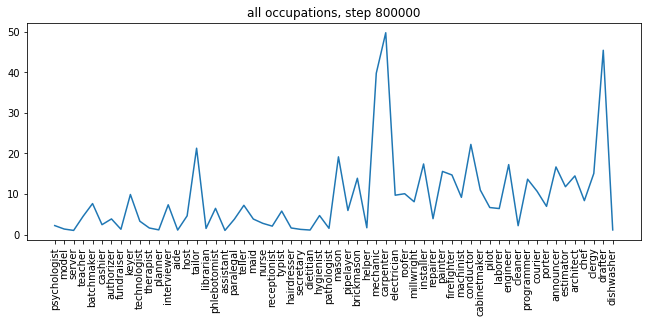

100%|██████████| 60/60 [00:11<00:00,  5.37it/s]


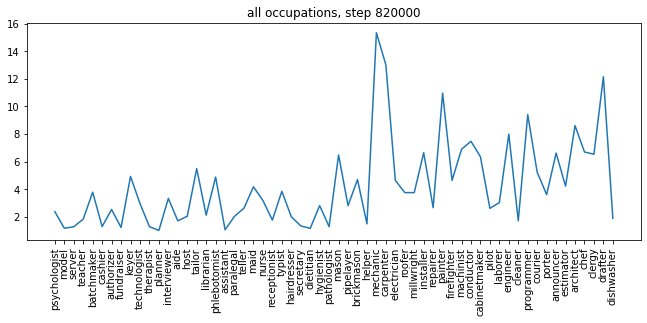

100%|██████████| 60/60 [00:10<00:00,  5.97it/s]


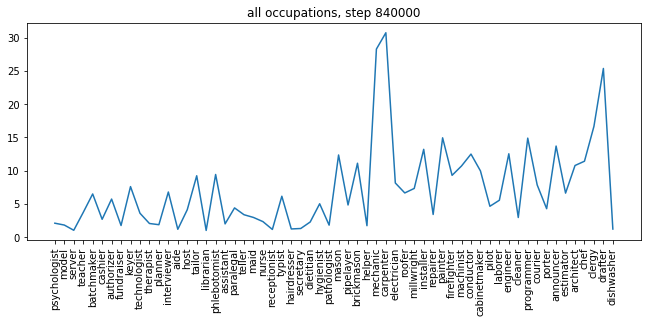

100%|██████████| 60/60 [00:11<00:00,  5.32it/s]


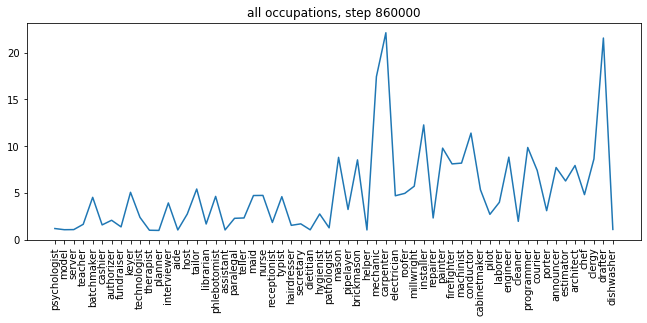

100%|██████████| 60/60 [00:11<00:00,  5.44it/s]


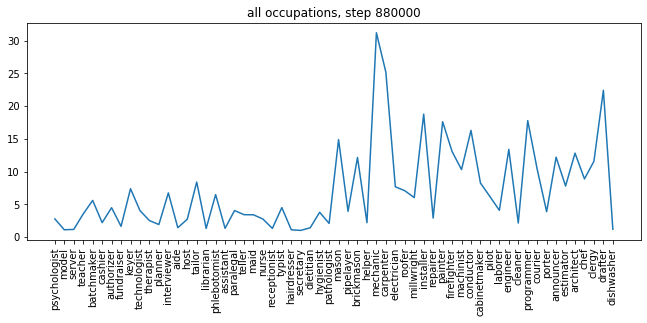

100%|██████████| 60/60 [00:11<00:00,  5.44it/s]


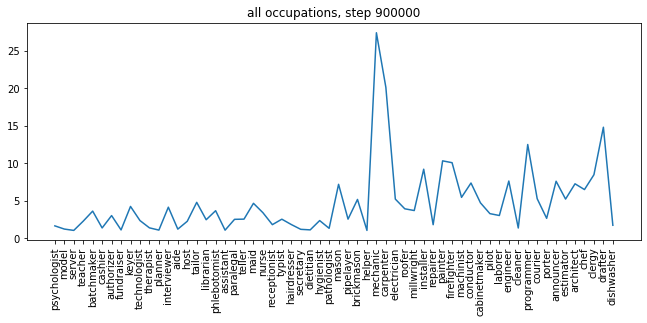

100%|██████████| 60/60 [00:11<00:00,  5.18it/s]


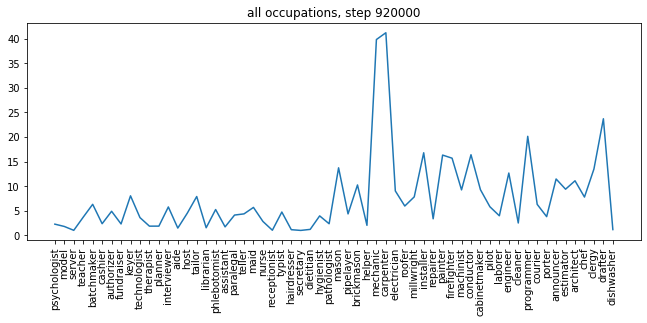

100%|██████████| 60/60 [00:11<00:00,  5.24it/s]


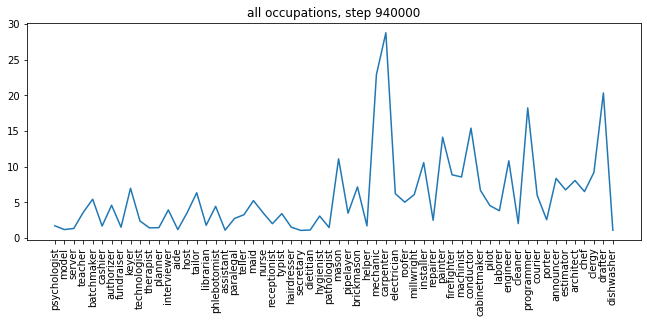

100%|██████████| 60/60 [00:11<00:00,  5.27it/s]


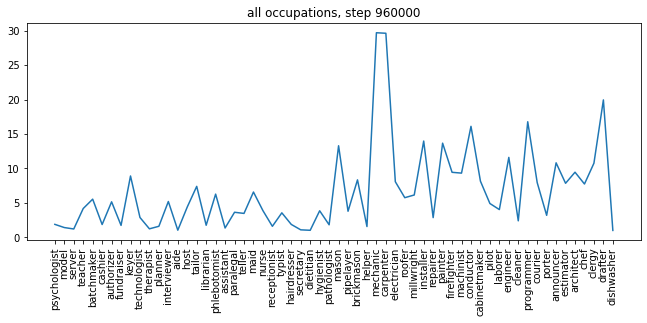

100%|██████████| 60/60 [00:12<00:00,  4.84it/s]


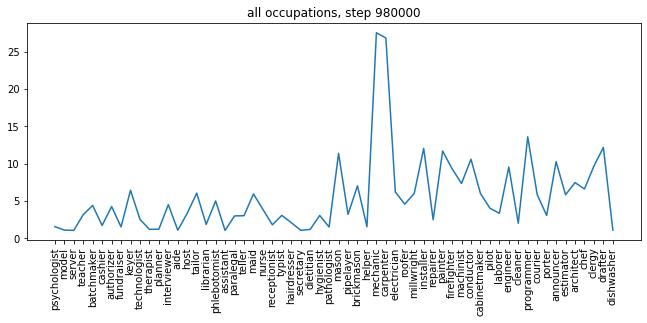

100%|██████████| 60/60 [00:11<00:00,  5.37it/s]


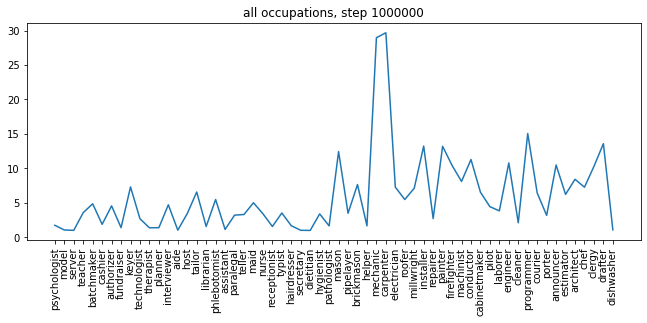

In [5]:
out_file = "/content/drive/MyDrive/yearly-bias/results/all-professions-bias.pkl"

all_ratios = []

softmax = torch.nn.Softmax(dim=1)

for number in sorted(all_numbers):
    model = AutoModelForMaskedLM.from_pretrained(f"/content/drive/MyDrive/yearly-bias/models/checkpoint-{number}")
    tokenizer = RobertaTokenizerFast.from_pretrained(f"/content/drive/MyDrive/yearly-bias/models/checkpoint-{number}")

    unmasker = pipeline('fill-mask', model=model, tokenizer=tokenizer)

    ratios = []

    for occupation in tqdm(occupations):
        # naive vowel rule, works for this set
        det = "an" if occupation[0] in ["a", "e", "i", "o", "u"] else "a"

        sent = f"<mask> is {det} {occupation}."

        results = unmasker(sent, targets=tokens)

        ratio = results[0]['score']/results[1]['score'] # male/female
        ratios.append(ratio)

    all_ratios.append(ratios)

    fig, ax = plt.subplots(figsize=(11, 4))
    ax.set_title(f"all occupations, step {number}")
    ax.plot(occupations, ratios)
    ax.set_xticklabels(occupations, rotation = 90)
    plt.show()

In [6]:
# each run is around ? minutes

len(all_ratios) 

62

In [7]:
with open(out_file, "wb") as f:
    pickle.dump(all_ratios, f)